In [28]:
from scipy.stats import t
import numpy as np
from statsmodels.stats.multitest import multipletests

Data

In [37]:
base_plus = [("Alzheimers",0.7646117496437067, 0.006199594439251237),
    ("Anaphylaxis", 0.7139785473302508, 0.025165494738920543),
    ('Arrhythmia',0.7152292241660942, 0.0017542871392892),
    ('Basal cell carcinoma',0.6580632323982052, 0.003268378951083509),
    ('Breast cancer',0.5756642357659147, 0.06751167197314878),
    ('Colon cancer',0.6361396837988609, 0.00809663539415746),
    ('Death',0.8747668505170315, 0.0005990714727588633),
    ('Depression',0.7181939349284605, 0.0020360149069585088),
    ('Diabetes',0.8481784967500403, 0.0004881060129774714),
    ('Diarrhea',0.8653198622201709, 0.0039009293674818883),
    ('Large fetus',0.6075682250680772, 0.06782825189979147),
    ('Lung cancer',0.6788918809792204, 0.008060215580879847),
    ('Major bleeding',0.7894152616793806, 0.0023107663362857845),
    ('Myocardial Infarction',0.6834031915673673, 0.0020479339807279767),
    ('Osteonecrosis',0.8460638348557891, 0.032942492738011635),
    ('Pain',float('nan'), float('nan')),
    ('Pancreatic cancer',0.5747860337101514, 0.041270914912163184),
    ('Placenta insufficiency', 0.5625092372883999, 0.0488961976556555),
    ('Pneumonia',0.8298115908250276, 0.0006241927461448603),
    ('Preterm',0.5454008674250075, 0.07048169428910403),
    ('Schizophrenia',0.8579317494854216, 0.004622990910040279),
    ('Sleep disorder',float('nan'), float('nan')),
    ('Stroke',float('nan'), float('nan')),
    ('Weight insufficiency',float('nan'), float('nan')),]
base_vs_best = [
    ("Alzheimer's", 0.738937, 0.0036091, 0.769839, 0.0051689),
    ('Anaphylaxis', 0.709688, 0.0141997, 0.719461, 0.0086401),
    ('Arrhythmia', 0.688675, 0.0022482, 0.716274, 0.0013717),
    ('Basal cell carcinoma', 0.644078, 0.0036666, 0.671652, 0.0092793),
    ('Breast cancer', 0.570155, 0.0751772, 0.624161, 0.0051217),
    ('Colon cancer', 0.614381, 0.0070084, 0.62766, 0.0253835),
    ('Death', 0.86584, 0.0002528, 0.87651, 0.0005101),
    ('Depression', 0.712926, 0.0016426, 0.718552, 0.0015509),
    ('Diabetes', 0.835199, 0.0008988, 0.847962, 0.0019684),
    ('Diarrhea', 0.855665, 0.0020347, 0.875364, 0.0053888),
    ('Large fetus', 0.579319, 0.053829, 0.61554, 0.0548571),
    ('Lung cancer', 0.665305, 0.0039228, 0.683642, 0.0027886),
    ('Major bleeding', 0.782402, 0.0010462, 0.797382, 0.0022691),
    ('Myocardial Infarction', 0.656979, 0.0025453, 0.687221, 0.0028827),
    ('Osteonecrosis', 0.825013, 0.0502337, 0.842179, 0.0378151),
    ('Pain', 0.807778, 0.0003432, 0.822218, 0.0001851),
    ('Pancreatic cancer', 0.529042, 0.0568747, 0.565338, 0.031916),
    ('Placenta insufficiency', 0.587991, 0.0101103, 0.586343, 0.0219247),
    ('Pneumonia', 0.822824, 0.000695, 0.832331, 0.0013375),
    ('Preterm', 0.533679, 0.0381189, 0.594583, 0.0540215),
    ('Schizophrenia', 0.838357, 0.0030541, 0.86039, 0.005898),
    ('Sleep disorder', 0.747797, 0.0019297, 0.75928, 0.0023461),
    ('Stroke', 0.64517, 0.0106881, 0.701815, 0.0082576),
    ('Weight insufficiency', 0.569131, 0.0329179, 0.61668, 0.0046895)
]
base = [(category, mean_base, std_base) for category, mean_base, std_base, _, _ in base_vs_best]
best = [(category, mean_best, std_best) for category, _, _, mean_best, std_best in base_vs_best]
base_vs_base_plus = [(category, mean_base, std_base, mean_base_plus, std_base_plus) for (category, mean_base, std_base), (_, mean_base_plus, std_base_plus) in zip(base, base_plus)]
base_plus_vs_best = [(category, mean_base_plus, std_base_plus, mean_best, std_best) for (category, mean_base_plus, std_base_plus), (_, mean_best, std_best) in zip(base_plus, best)]

comparison_dicts = {'base_vs_best': base_vs_best,
    'base_vs_base_plus': base_vs_base_plus, 
    'base_plus_vs_best': base_plus_vs_best}

In [69]:
[(cat, round(mean,3)) for cat, mean, std,_,_ in base_plus_vs_best]

[('Alzheimers', 0.765),
 ('Anaphylaxis', 0.714),
 ('Arrhythmia', 0.715),
 ('Basal cell carcinoma', 0.658),
 ('Breast cancer', 0.576),
 ('Colon cancer', 0.636),
 ('Death', 0.875),
 ('Depression', 0.718),
 ('Diabetes', 0.848),
 ('Diarrhea', 0.865),
 ('Large fetus', 0.608),
 ('Lung cancer', 0.679),
 ('Major bleeding', 0.789),
 ('Myocardial Infarction', 0.683),
 ('Osteonecrosis', 0.846),
 ('Pain', nan),
 ('Pancreatic cancer', 0.575),
 ('Placenta insufficiency', 0.563),
 ('Pneumonia', 0.83),
 ('Preterm', 0.545),
 ('Schizophrenia', 0.858),
 ('Sleep disorder', nan),
 ('Stroke', nan),
 ('Weight insufficiency', nan)]

Calculate P-values

In [38]:
# Calculate the t-statistic and p-value for each category
N = 5  # number of observations
def get_p_values(data: list):
    results = []
    for category, mean_base, std_base, mean_best, std_best in data:
        mean_diff = mean_best - mean_base
        se_diff = np.sqrt((std_base**2 / N) + (std_best**2 / N))  # Standard error of the mean difference
        t_stat = mean_diff / se_diff  # t-statistic
        p_value = t.sf(np.abs(t_stat), df=n-1)  # one-sided p-value
        results.append((category,  round(p_value,9)))
    return results
p_values_dict = {comparison: get_p_values(data) for comparison, data in comparison_dicts.items()}

In [70]:
p_values_dict['base_vs_best']

[("Alzheimer's", 0.000196805),
 ('Anaphylaxis', 0.129456479),
 ('Arrhythmia', 9.83e-06),
 ('Basal cell carcinoma', 0.001741832),
 ('Breast cancer', 0.092137874),
 ('Colon cancer', 0.161278116),
 ('Death', 9.69e-07),
 ('Depression', 0.002547221),
 ('Diabetes', 9.5466e-05),
 ('Diarrhea', 0.000785558),
 ('Large fetus', 0.175705609),
 ('Lung cancer', 0.000520768),
 ('Major bleeding', 8.9542e-05),
 ('Myocardial Infarction', 3.071e-05),
 ('Osteonecrosis', 0.287265021),
 ('Pain', 6.4e-08),
 ('Pancreatic cancer', 0.140635256),
 ('Placenta insufficiency', 0.443039677),
 ('Pneumonia', 7.3347e-05),
 ('Preterm', 0.054239497),
 ('Schizophrenia', 0.000881391),
 ('Sleep disorder', 0.000536652),
 ('Stroke', 0.00036014),
 ('Weight insufficiency', 0.016487253)]

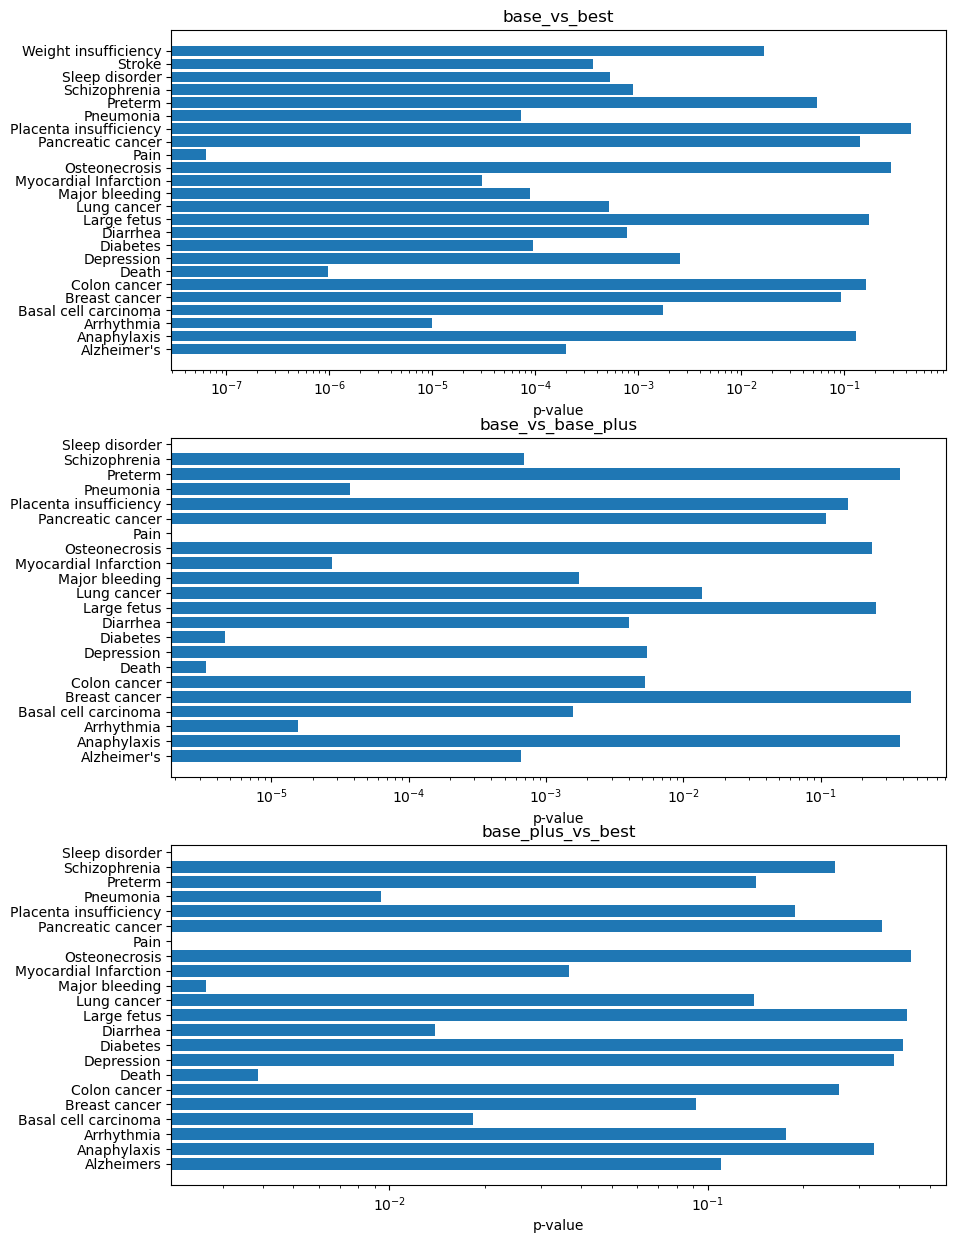

In [40]:
# plot p values, three subplots, one for each comparison
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i, (comparison, p_values) in enumerate(p_values_dict.items()):
    p_values = [p for _, p in p_values]
    axs[i].barh([category for category, _ in p_values_dict[comparison]], p_values)
    axs[i].set_title(comparison)
    axs[i].set_xlabel('p-value')
    axs[i].set_xscale('log')

In [54]:
from typing import List, Tuple
def check_significance(p_values:List[Tuple])->List[Tuple]:
    significances = []
    for category, p_value in p_values:
        difference = ''
        if p_value<0.05:
            difference = '*'
        if p_value<0.01:
            difference = '**'
        if p_value<0.001:
            difference = '***'
        
        significances.append((category, p_value, difference))    
        
    return significances

In [63]:
def apply_benjamini_hochberg_and_get_significance(p_values:List[Tuple])->List[Tuple]:
    # ignore nan values
    p_values = [(category, p_value) for category, p_value in p_values if not np.isnan(p_value)]
    adjusted_p_values = multipletests([p for _, p in p_values], alpha=0.05, method='fdr_bh')[1]
    adjusted_results = list(zip([category for category, _ in p_values], adjusted_p_values))
    adjusted_results_with_significance = check_significance(adjusted_results)
    return adjusted_results_with_significance
# # List of p-values
# p_values = [res[1] for res in revised_results]
# categories = [res[0] for res in revised_results]
# # Apply Benjamini-Hochberg procedure
# adjusted_p_values = multipletests(p_values, alpha=0.05, method='fdr_bh')[1]
# adjusted_results = list(zip(categories, adjusted_p_values))
# adjusted_results_with_significance = check_alpha(adjusted_results)
# adjusted_results_with_significanceb

In [64]:
significance_dic = {}
for comp, dic in p_values_dict.items():
    significance_dic[comp]= apply_benjamini_hochberg_and_get_significance(dic)

In [71]:
significance_dic['base_vs_base_plus']

[("Alzheimer's", 0.001984114285714286, '**'),
 ('Anaphylaxis', 0.39999428210526317, ''),
 ('Arrhythmia', 0.00010478666666666668, '***'),
 ('Basal cell carcinoma', 0.0038644044444444445, '**'),
 ('Breast cancer', 0.454420981, ''),
 ('Colon cancer', 0.008999201666666666, '**'),
 ('Death', 4.5889999999999996e-05, '***'),
 ('Depression', 0.008999201666666666, '**'),
 ('Diabetes', 4.5889999999999996e-05, '***'),
 ('Diarrhea', 0.0080041, '**'),
 ('Large fetus', 0.29772346, ''),
 ('Lung cancer', 0.02119257230769231, '*'),
 ('Major bleeding', 0.0038644044444444445, '**'),
 ('Myocardial Infarction', 0.00013737, '***'),
 ('Osteonecrosis', 0.29772346, ''),
 ('Pancreatic cancer', 0.15657567142857143, ''),
 ('Placenta insufficiency', 0.211654416, ''),
 ('Pneumonia', 0.000149736, '***'),
 ('Preterm', 0.39999428210526317, ''),
 ('Schizophrenia', 0.001984114285714286, '**')]

In [72]:
significance_dic['base_plus_vs_best']

[('Alzheimers', 0.276455205, ''),
 ('Anaphylaxis', 0.435449174, ''),
 ('Arrhythmia', 0.31354403, ''),
 ('Basal cell carcinoma', 0.073251592, ''),
 ('Breast cancer', 0.2635516114285714, ''),
 ('Colon cancer', 0.36855631285714285, ''),
 ('Death', 0.038699569999999996, '*'),
 ('Depression', 0.435449174, ''),
 ('Diabetes', 0.435449174, ''),
 ('Diarrhea', 0.06971749499999999, ''),
 ('Large fetus', 0.435449174, ''),
 ('Lung cancer', 0.283276482, ''),
 ('Major bleeding', 0.038699569999999996, '*'),
 ('Myocardial Infarction', 0.12203400666666668, ''),
 ('Osteonecrosis', 0.435449174, ''),
 ('Pancreatic cancer', 0.435449174, ''),
 ('Placenta insufficiency', 0.31354403, ''),
 ('Pneumonia', 0.06276480666666666, ''),
 ('Preterm', 0.283276482, ''),
 ('Schizophrenia', 0.36855631285714285, '')]

In [73]:
significance_dic['base_vs_best']

[("Alzheimer's", 0.0005904150000000001, '***'),
 ('Anaphylaxis', 0.16352397347368425, ''),
 ('Arrhythmia', 7.864e-05, '***'),
 ('Basal cell carcinoma', 0.002985997714285714, '**'),
 ('Breast cancer', 0.12285049866666665, ''),
 ('Colon cancer', 0.18431784685714286, ''),
 ('Death', 1.1628e-05, '***'),
 ('Depression', 0.0040755536, '**'),
 ('Diabetes', 0.00032731199999999996, '***'),
 ('Diarrhea', 0.001571116, '**'),
 ('Large fetus', 0.1916788461818182, ''),
 ('Lung cancer', 0.0011708770909090909, '**'),
 ('Major bleeding', 0.00032731199999999996, '***'),
 ('Myocardial Infarction', 0.00018426000000000003, '***'),
 ('Osteonecrosis', 0.29975480452173914, ''),
 ('Pain', 1.5360000000000002e-06, '***'),
 ('Pancreatic cancer', 0.1687623072, ''),
 ('Placenta insufficiency', 0.443039677, ''),
 ('Pneumonia', 0.00032731199999999996, '***'),
 ('Preterm', 0.07657340752941176, ''),
 ('Schizophrenia', 0.0016271833846153848, '**'),
 ('Sleep disorder', 0.0011708770909090909, '**'),
 ('Stroke', 0.00096037